<a href="https://colab.research.google.com/github/AugustineKwabenaAntwi/adventurous_nastartium-computer_vision-g-CNN/blob/main/NMA_project__easyocr__.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT

In [ ]:
# Imports
import random

import torch
import numpy as np
import matplotlib.pyplot as plt

import torch.nn as nn
import torch.optim as optim
from tqdm.auto import tqdm
from IPython.display import display
from torch.utils.data import DataLoader, TensorDataset

import os
import pandas as pd

# install and import easyocr
!pip install easyocr
import easyocr

# install and import cv2
!pip install opencv-python
import cv2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 21.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manyl

In [ ]:
# @title Figure settings
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

import ipywidgets as widgets  # Interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/content-creation/main/nma.mplstyle")

# Example for using the pre-trained easyocr model



Load a database

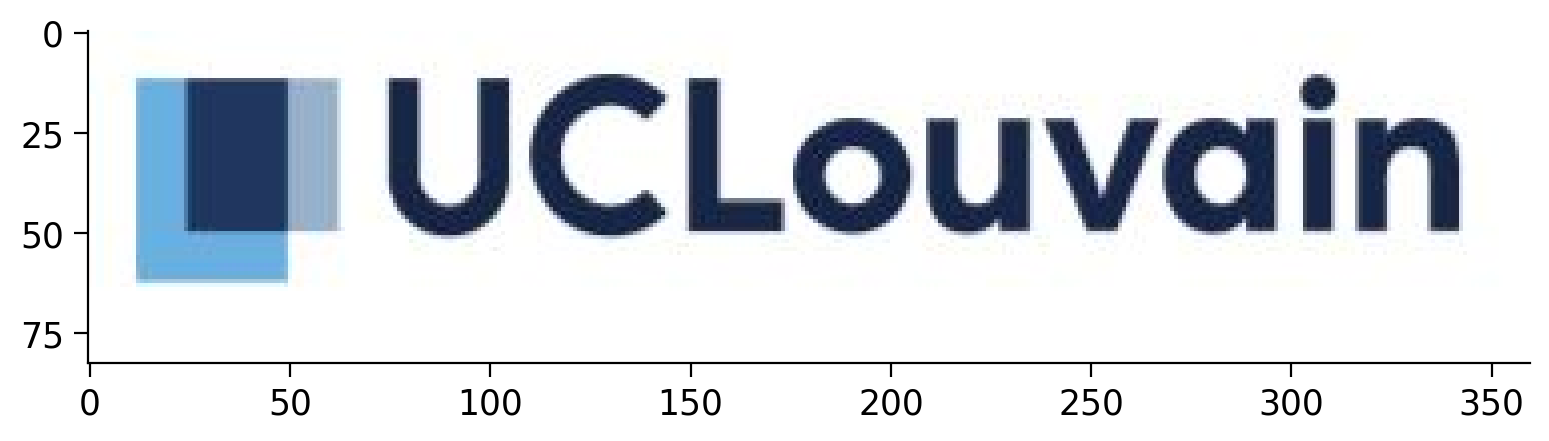

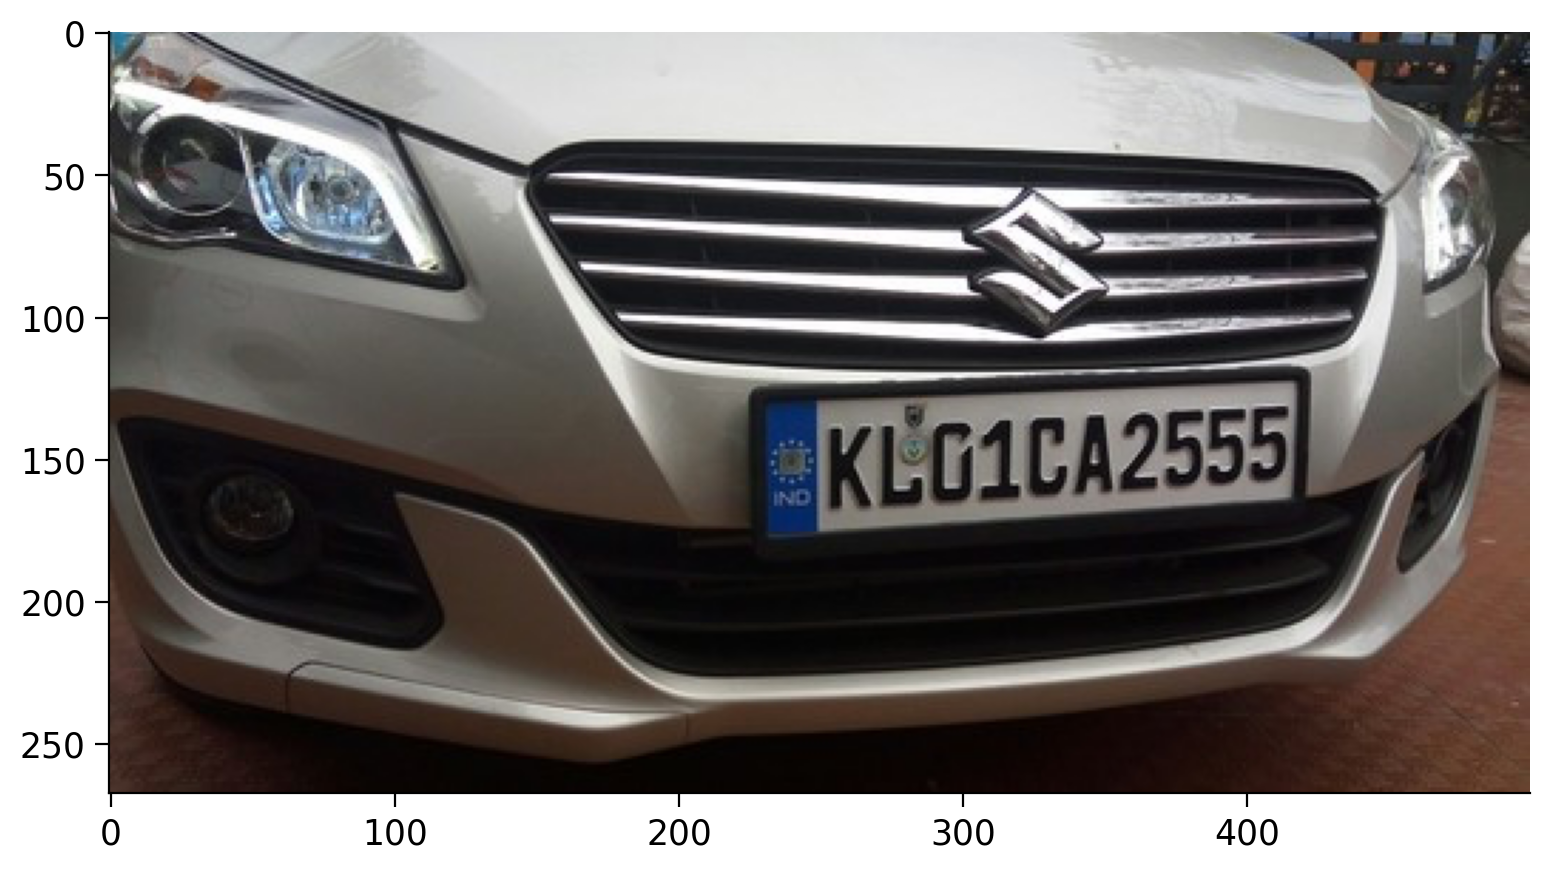

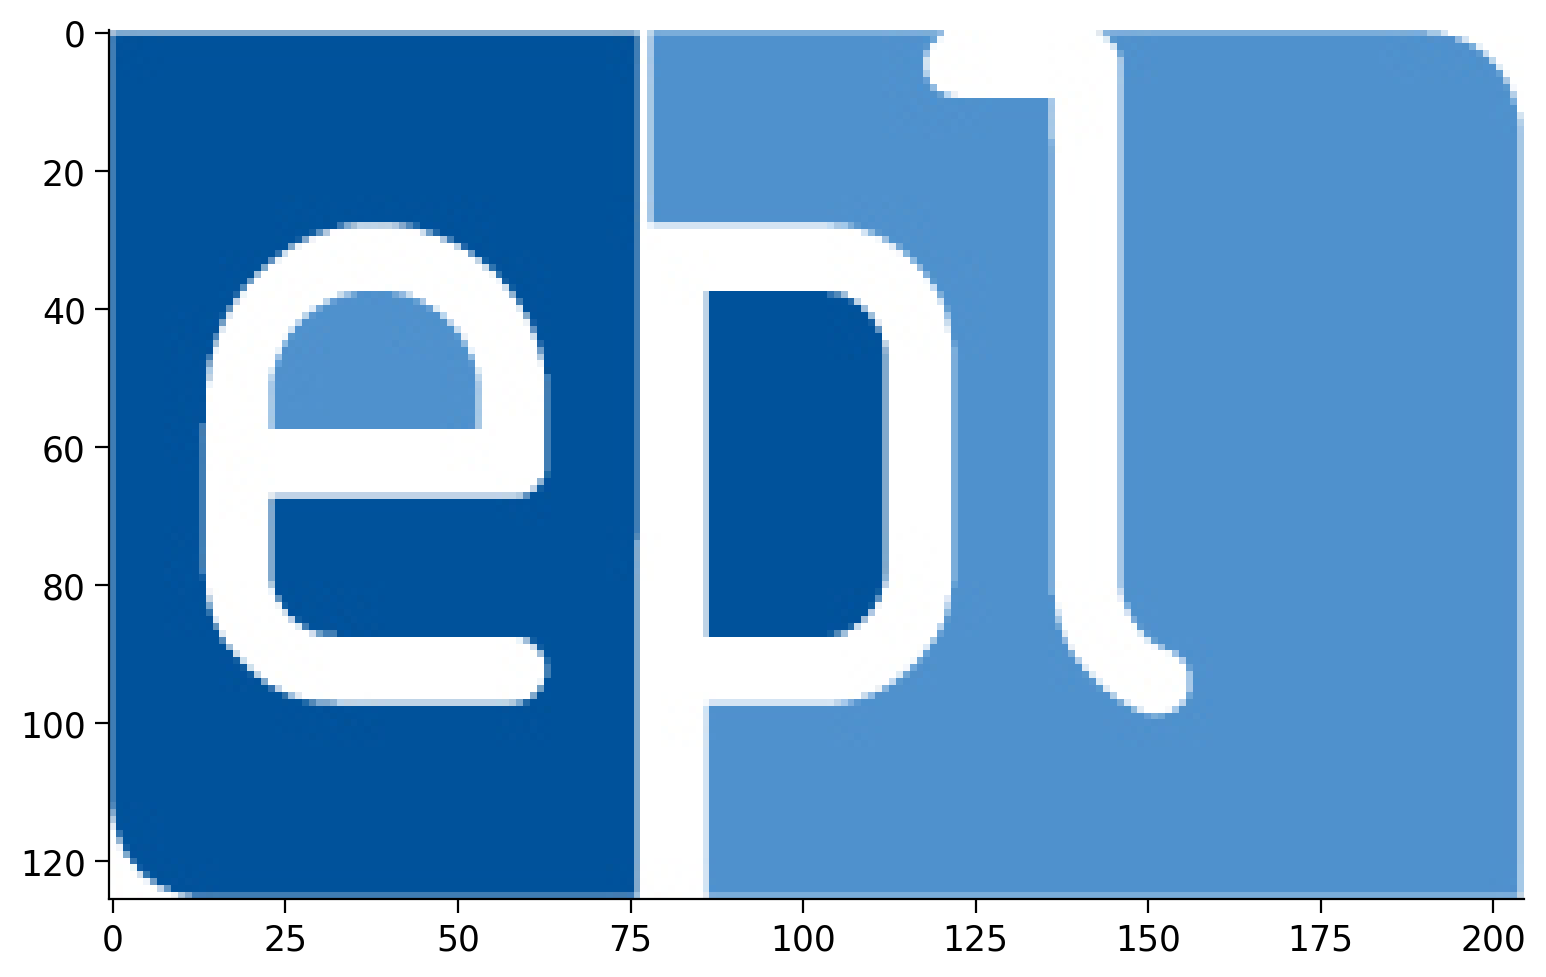

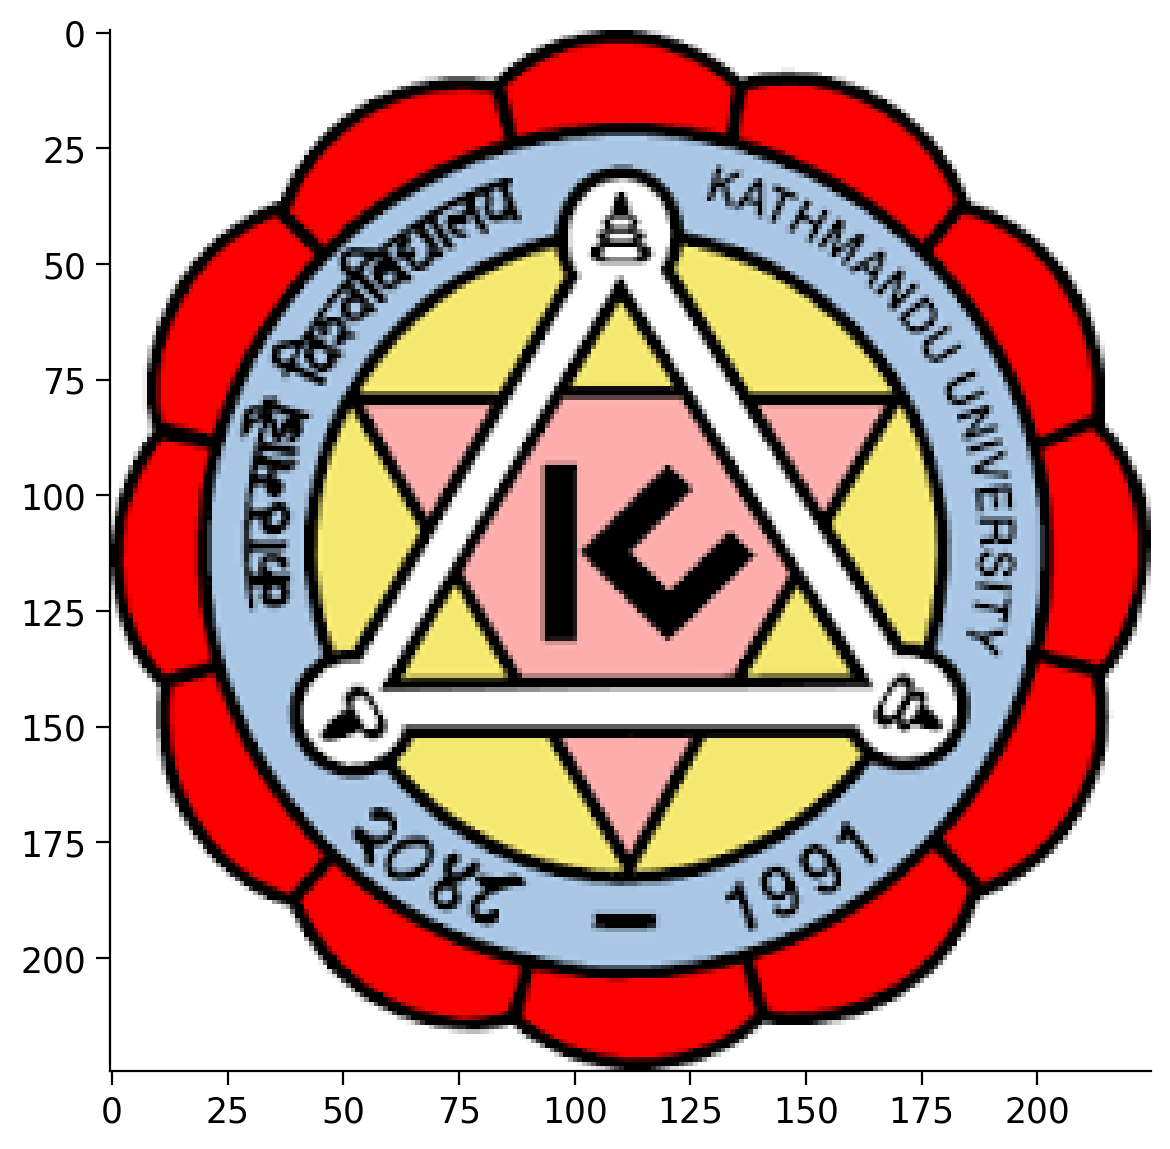

In [ ]:
# from "sample_data" colab folder, load file "Cars0.png" to a variable data0
image_filenames = ['logUCL.JPG', 'Cars0.png', 'logo_epl.jpg', 'téléchargement (1).png'] # change with you images
# display it
for image_filename in image_filenames:
  plt.imshow(plt.imread(image_filename))
  plt.show()


For each detection res in results, the first item res[0] represents the xy image coordinates of the bounding box containing the detected text. The next two items res[1] and res[2] represent the detected text and confidence of detection, respectively. The last two lines of the code plots a red rectangle around each text detection, and prints the text and detection confidence at the top left corner of the rectangle.

In [ ]:
# This needs to run only once to load the model into memory
reader = easyocr.Reader(['en'])


[[68, 4], [352, 4], [352, 60], [68, 60]]


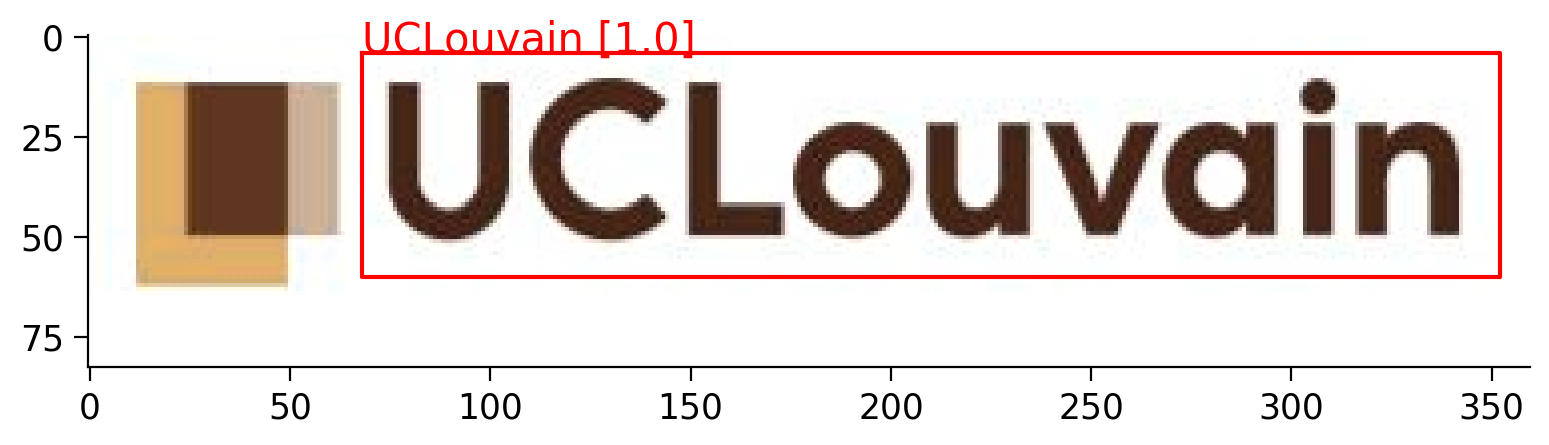

[[241, 117], [424, 117], [424, 178], [241, 178]]


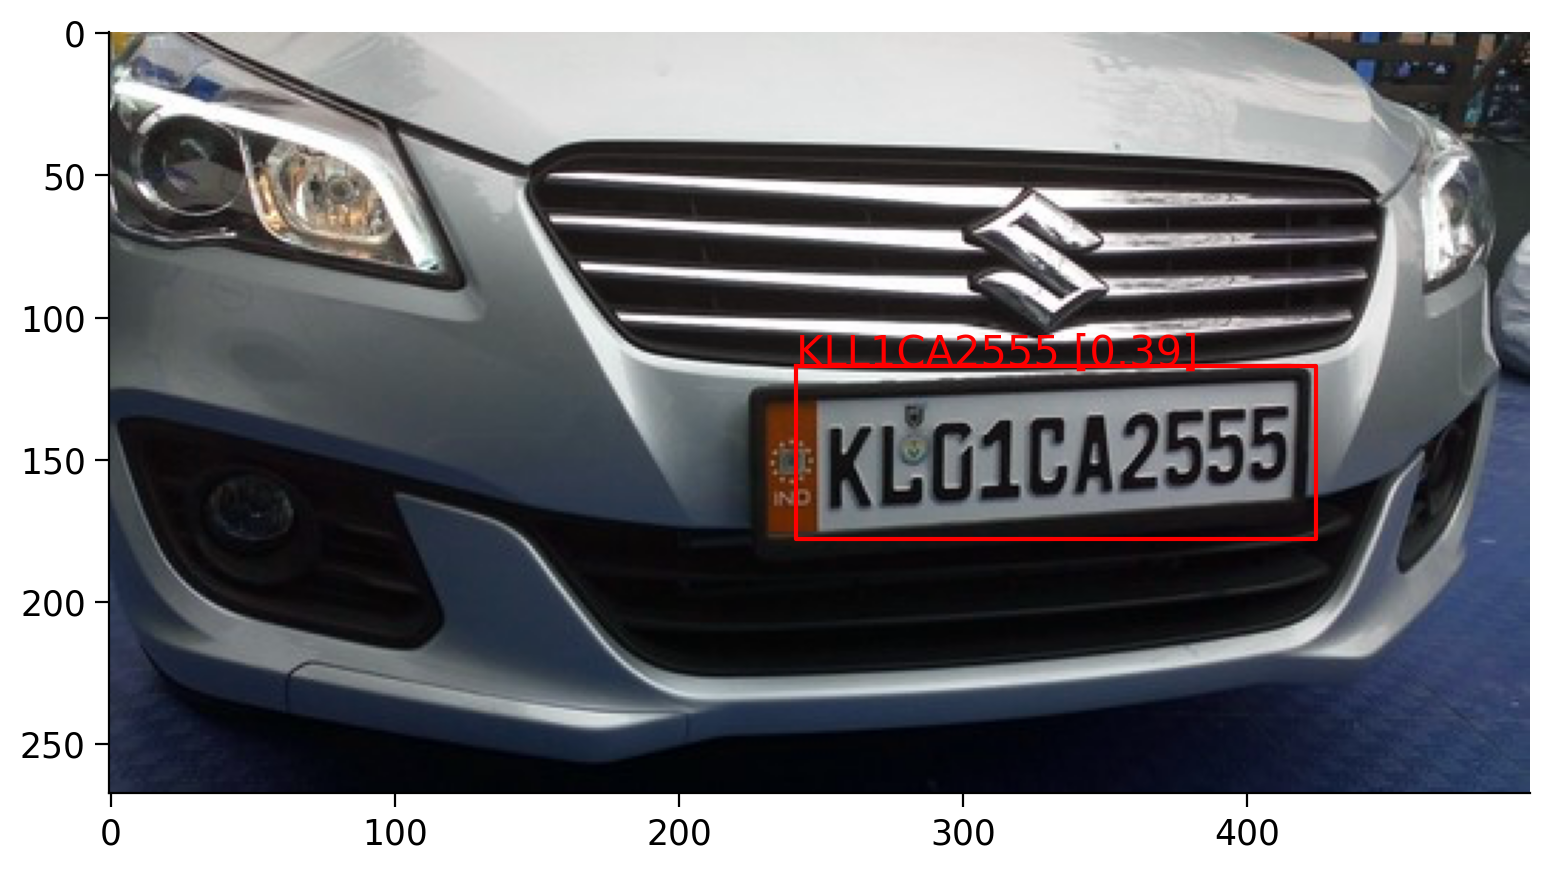

[[1, 0], [175, 0], [175, 126], [1, 126]]


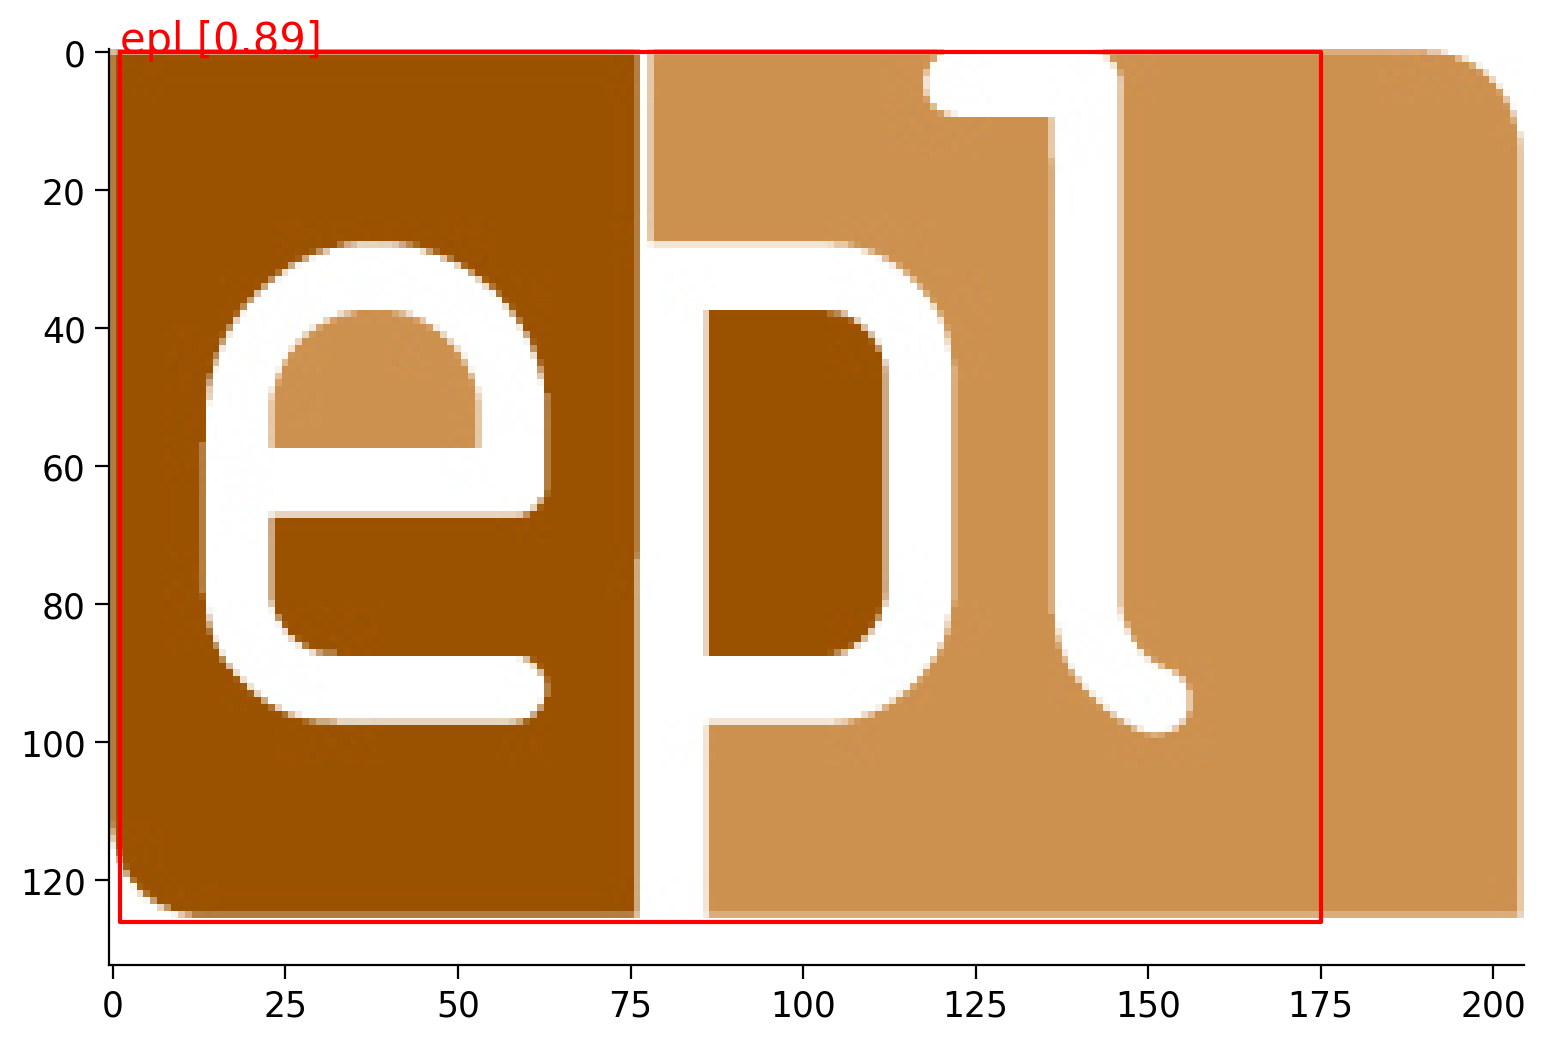

[[29, 79], [45, 79], [45, 113], [29, 113]]
[[185, 97], [199, 97], [199, 123], [185, 123]]
[[131, 175], [161, 175], [161, 195], [131, 195]]
[[135.65440104398374, 18.030085950707374], [193.86810366970218, 61.285725067466814], [181.34559895601626, 78.96991404929263], [122.13189633029783, 36.714274932533186]]
[[22.02202795004179, 63.16388105512118], [81.58304960420142, 15.451676246895278], [96.97797204995821, 39.83611894487882], [37.41695039579858, 86.54832375310473]]
[[176.60127388858555, 73.08292994374676], [189.29827499313595, 69.04552002196498], [199.39872611141445, 97.91707005625324], [186.70172500686405, 102.95447997803502]]
[[53.25487394919689, 158.09400840186785], [96.99940017994003, 180.9400119964012], [84.74512605080311, 202.90599159813215], [41.00059982005998, 180.0599880035988]]


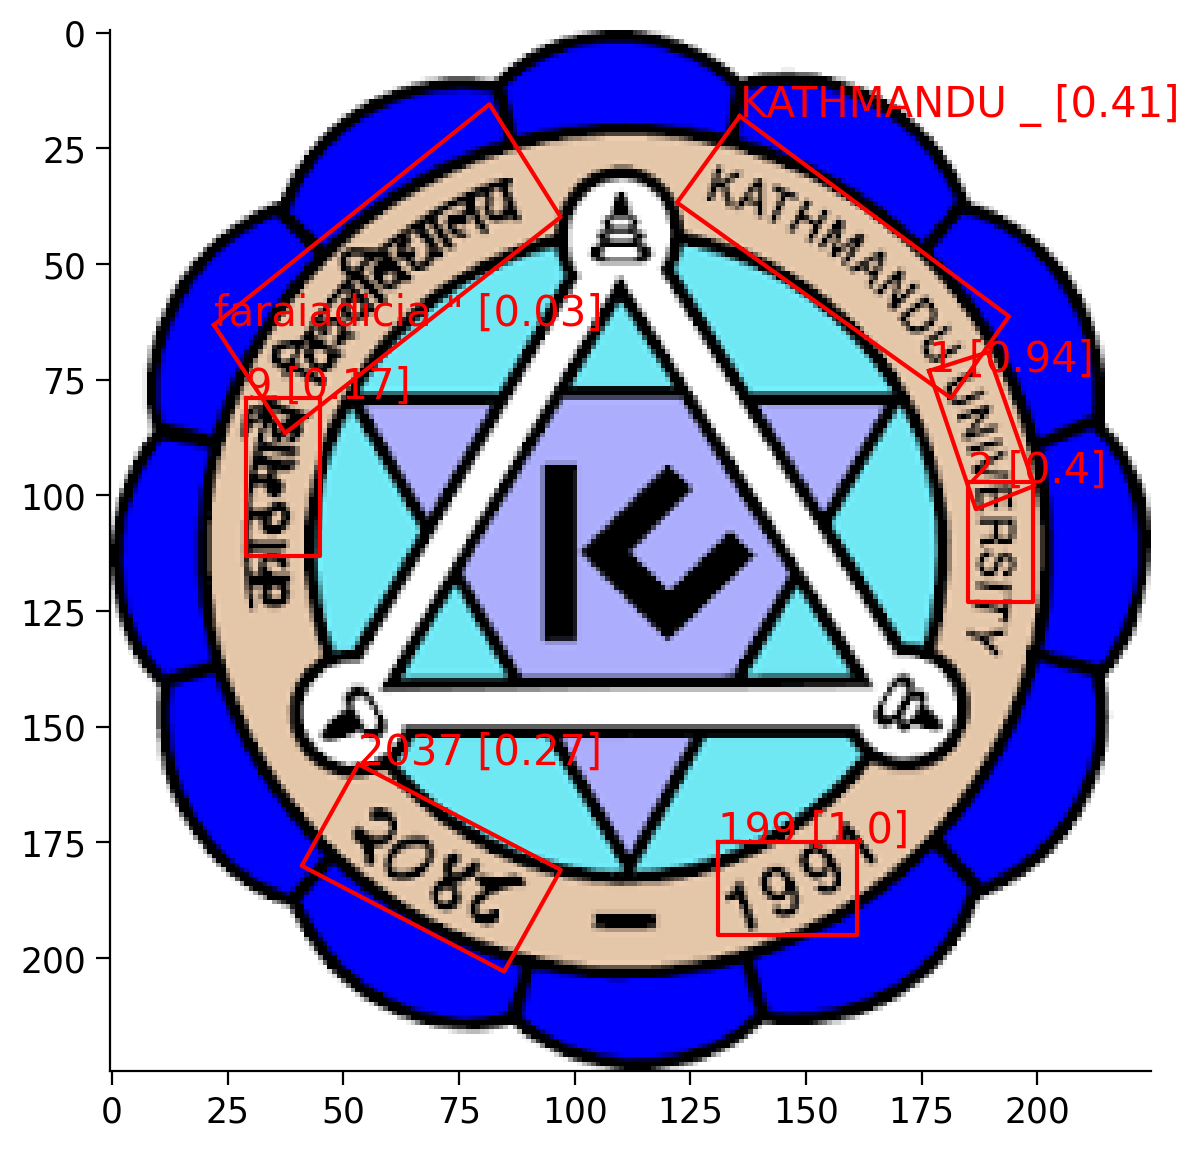

In [ ]:
for image_filename in image_filenames:
  # reading the image
  img = cv2.imread(image_filename)

  # run OCR
  results = reader.readtext(img)

  # show the image and plot the results
  plt.imshow(img)
  for res in results:
      # bbox coordinates of the detected text
      xy = res[0]
      xy1, xy2, xy3, xy4 = xy[0], xy[1], xy[2], xy[3]
      # text results and confidence of detection
      det, conf = res[1], res[2]
      # show time :)
      plt.plot([xy1[0], xy2[0], xy3[0], xy4[0], xy1[0]], [xy1[1], xy2[1], xy3[1], xy4[1], xy1[1]], 'r-')
      plt.text(xy1[0], xy1[1], f'{det} [{round(conf, 2)}]', c='r')
  plt.show()